**SE RECOMIENDA NO PONER EJECUTAR TODO E IR EJECUTANDO POR MODULOS EN TODO CASO, YA QUE HEMOS HECHO UN GRIDCV BASTANTE CARGADO DE HP EN ALGUNOS CASOS QUE TARDA MUCHO TIEMPO.**

# Trabajo Practico N° 3 - Mineria de datos

**Alumnos:**

* Donnarumma, Cesar Julian
* Longo Bruno

# Librerias:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import  GridSearchCV, train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate, cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

# Conjunto de datos: CoffeeRatings.csv

1. Descargar el conjunto de CoffeeRatings.csv1, para realizar el trabajo práctico. Analizar
los atributos del conjunto de datos (distribuciones, valores, outliers, tipos de datos, etc.)
2. Realizar la predicción del atributo Color utilizando máquinas de vectores con kernel lineal
analizando el parámetro costo. Mostar los resultados sobre los conjuntos de test
(Precisión, Exhaustividad y Exactitud) utilizando validación cruzada con k =5.
3. Realizar la predicción del atributo Color utilizando máquinas de vectores con kernel
gaussiano analizando los parámetros costo y gama. Mostar los resultados sobre los
conjuntos de test (Precisión, Exhaustividad y Exactitud) utilizando validación cruzada con
k =5.
4. Realizar la predicción del atributo Color utilizando Random Forest analizando los
parámetros cantidad de estimadores y la máxima profundidad de los árboles. Mostar los
resultados sobre los conjuntos de test (Precisión, Exhaustividad y Exactitud) utilizando
validación cruzada con k =5

## Analisis de datos:

In [ ]:
# Carga del dataset
CoffeeDS = pd.read_csv('CoffeeRatings.csv', delimiter=";")

### Informacion de las columnas:

In [ ]:
# Informacion de las columnas
CoffeeDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Scores_Aroma       835 non-null    int64 
 1   Scores_Flavor      835 non-null    int64 
 2   Scores_Aftertaste  835 non-null    int64 
 3   Scores_Acidity     835 non-null    int64 
 4   Scores_Body        835 non-null    int64 
 5   Scores_Balance     835 non-null    int64 
 6   Scores_Uniformity  835 non-null    int64 
 7   Scores_Sweetness   835 non-null    int64 
 8   Scores_Moisture    835 non-null    int64 
 9   Scores_Total       835 non-null    int64 
 10  Color              835 non-null    object
dtypes: int64(10), object(1)
memory usage: 71.9+ KB


* Hay 10 columnas en total.

* 9 columnas de tipo entero que representan scores para distintas caracteristicas de los granos de cafe.

* 1 columna de tipo categorica que es el color del grano de cafe.

* En total hay 835 filas.

* El dataset no presenta valores nulos.

### Vistazo rapido de las primeras filas:

In [ ]:
CoffeeDS.head()

,Scores_Aroma,Scores_Flavor,Scores_Aftertaste,Scores_Acidity,Scores_Body,Scores_Balance,Scores_Uniformity,Scores_Sweetness,Scores_Moisture,Scores_Total,Color
0,85,85,80,80,80,80,100,100,12,8692,Green
1,85,817,80,775,80,80,100,100,12,8642,Green
2,833,80,80,80,775,80,100,100,11,8608,Blue-Green
3,80,80,80,767,775,80,100,100,11,8542,Blue-Green
4,80,792,775,775,80,775,100,100,11,8492,Green


### Medidas resumen:

In [ ]:
CoffeeDS.columns

Index(['Scores_Aroma', 'Scores_Flavor', 'Scores_Aftertaste', 'Scores_Acidity',
       'Scores_Body', 'Scores_Balance', 'Scores_Uniformity',
       'Scores_Sweetness', 'Scores_Moisture', 'Scores_Total', 'Color'],
      dtype='object')

In [ ]:
CoffeeDS.describe()

,Scores_Aroma,Scores_Flavor,Scores_Aftertaste,Scores_Acidity,Scores_Body,Scores_Balance,Scores_Uniformity,Scores_Sweetness,Scores_Moisture,Scores_Total
count,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000
mean,623.726946,615.576048,611.677844,617.116168,610.330539,611.276647,191.758084,157.644311,8.231138,6675.440719
std,273.720152,274.245606,263.865747,274.480062,276.366482,276.300203,257.583828,203.439529,5.130245,3007.519639
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,717.000000,708.000000,683.000000,717.000000,708.000000,692.000000,100.000000,100.000000,1.000000,7792.000000
50%,758.000000,742.000000,733.000000,742.000000,742.000000,742.000000,100.000000,100.000000,11.000000,8183.000000
75%,775.000000,767.000000,758.000000,767.000000,767.000000,767.000000,100.000000,100.000000,12.000000,8325.000000
max,875.000000,883.000000,867.000000,875.000000,842.000000,858.000000,933.000000,933.000000,17.000000,9058.000000


* Las variables ['Scores_Aroma', 'Scores_Flavor', 'Scores_Aftertaste', 'Scores_Acidity', 'Scores_Body', 'Scores_Balance', 'Scores_Uniformity', 'Scores_Sweetness' ] varian entre 0 y 900 aproximadamente.

* La variable ['Scores_Moisture'] varia entre 0 y 17.

* Y la variable ['Scores_Total'] varia entre 0 y 9058.

* En las variables ['Scores_Aroma', 'Scores_Flavor', 'Scores_Aftertaste', 'Scores_Acidity', 'Scores_Body', 'Scores_Balance', 'Scores_Total'] destaca la gran variabilidad que hay en el primer cuartil, pero la mayoria de los datos estan concentrados en un rango de valores mucho mas pequeño.

* Las variables ['Scores_Uniformity', 'Scores_Sweetness'] tienen mucha variabilidad en el ultimo cuartil y pasa lo contrario que con las anteriores.

### Balanceo de clases objetivo:

In [ ]:
CoffeeDS['Color'].unique()

array(['Green', 'Blue-Green', 'Bluish-Green'], dtype=object)

Hay 3 tipos de color.

In [ ]:
CoffeeDS['Color'].value_counts()

Green           681
Bluish-Green     96
Blue-Green       58
Name: Color, dtype: int64

In [ ]:
round(( CoffeeDS['Color'].value_counts() * 100 ) / CoffeeDS['Color'].value_counts().sum(), 2)

Green           81.56
Bluish-Green    11.50
Blue-Green       6.95
Name: Color, dtype: float64

Notamos que la variable objetivo está claramente desbalanceada hacia Green, con el 82% del total aproximademente.

### Graficos de variables:

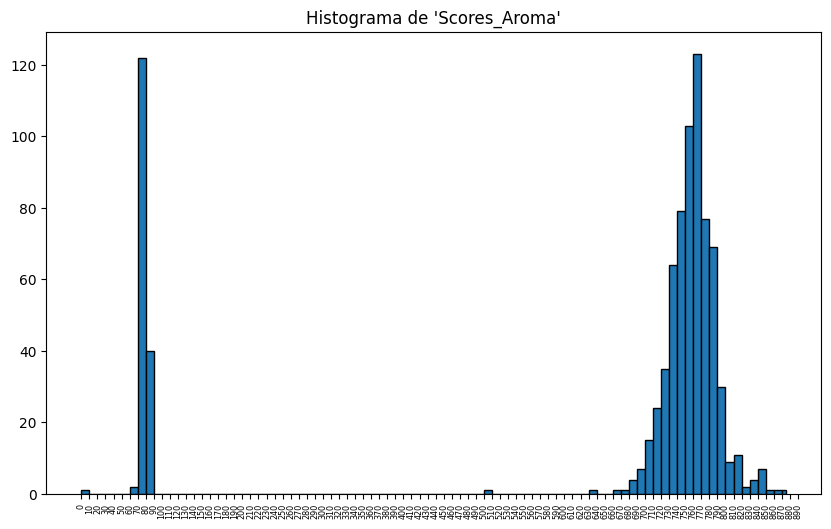

In [ ]:
plt.figure(figsize=(10, 6))
bins = np.append(np.arange(0, 870, 10), [870, 875])
plt.hist(CoffeeDS['Scores_Aroma'], bins = bins, edgecolor='black')
plt.xticks(range(0,900, 10), rotation=90, fontsize='xx-small')
plt.title("Histograma de 'Scores_Aroma'")
plt.show()

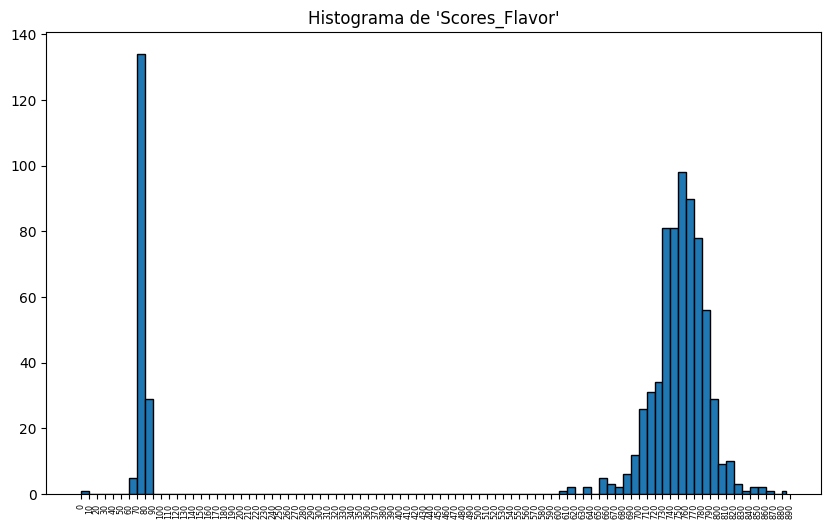

In [ ]:
plt.figure(figsize=(10, 6))
bins = np.append(np.arange(0, 880, 10), [880, 885])
plt.hist(CoffeeDS['Scores_Flavor'], bins = bins, edgecolor='black')
plt.xticks(range(0,900, 10), rotation=90, fontsize='xx-small')
plt.title("Histograma de 'Scores_Flavor'")
plt.show()

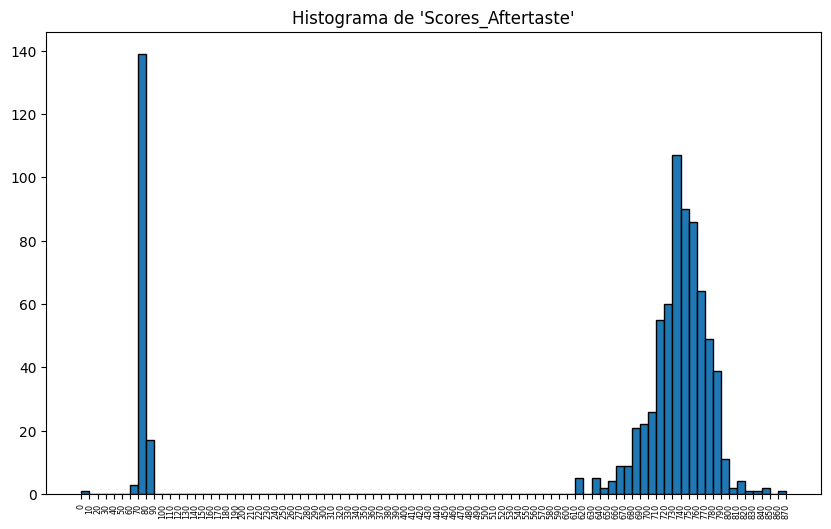

In [ ]:
plt.figure(figsize=(10, 6))
bins = np.append(np.arange(0, 860, 10), [860, 870])
plt.hist(CoffeeDS['Scores_Aftertaste'], bins = bins, edgecolor='black')
plt.xticks(range(0,880, 10), rotation=90, fontsize='xx-small')
plt.title("Histograma de 'Scores_Aftertaste'")
plt.show()

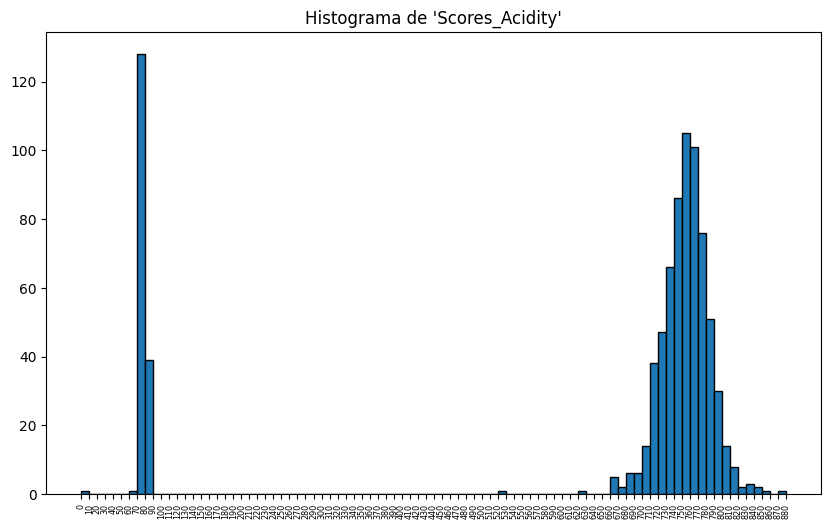

In [ ]:
plt.figure(figsize=(10, 6))
bins = np.append(np.arange(0, 870, 10), [870, 880])
plt.hist(CoffeeDS['Scores_Acidity'], bins = bins, edgecolor='black')
plt.xticks(range(0,890, 10), rotation=90, fontsize='xx-small')
plt.title("Histograma de 'Scores_Acidity'")
plt.show()

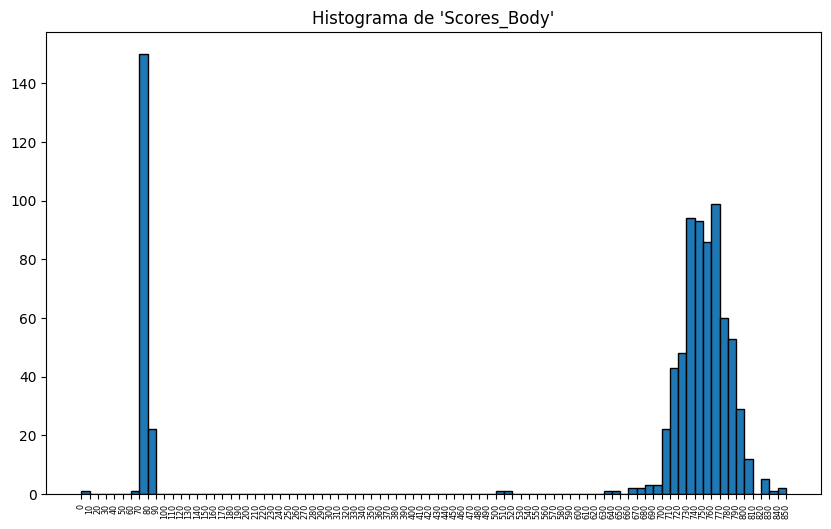

In [ ]:
plt.figure(figsize=(10, 6))
bins = np.append(np.arange(0, 840, 10), [840, 850])
plt.hist(CoffeeDS['Scores_Body'], bins = bins, edgecolor='black')
plt.xticks(range(0,860, 10), rotation=90, fontsize='xx-small')
plt.title("Histograma de 'Scores_Body'")
plt.show()

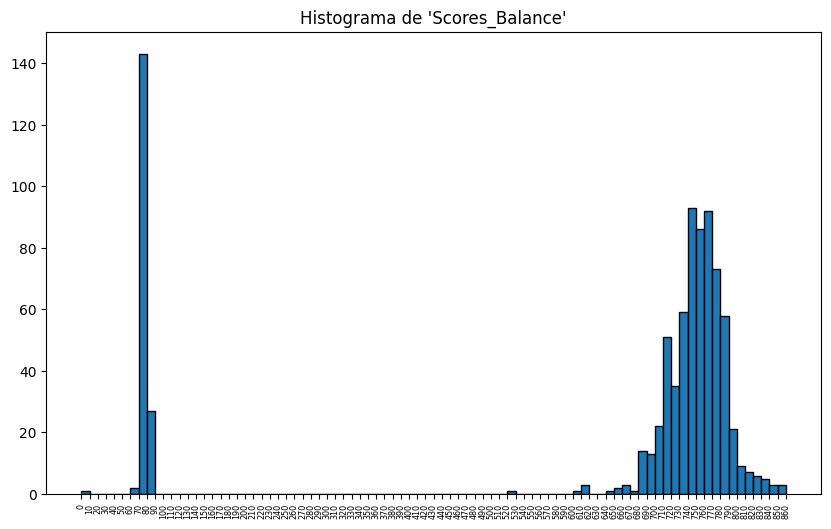

In [ ]:
plt.figure(figsize=(10, 6))
bins = np.append(np.arange(0, 850, 10), [850, 860])
plt.hist(CoffeeDS['Scores_Balance'], bins = bins, edgecolor='black')
plt.xticks(range(0, 870, 10), rotation=90, fontsize='xx-small')
plt.title("Histograma de 'Scores_Balance'")
plt.show()

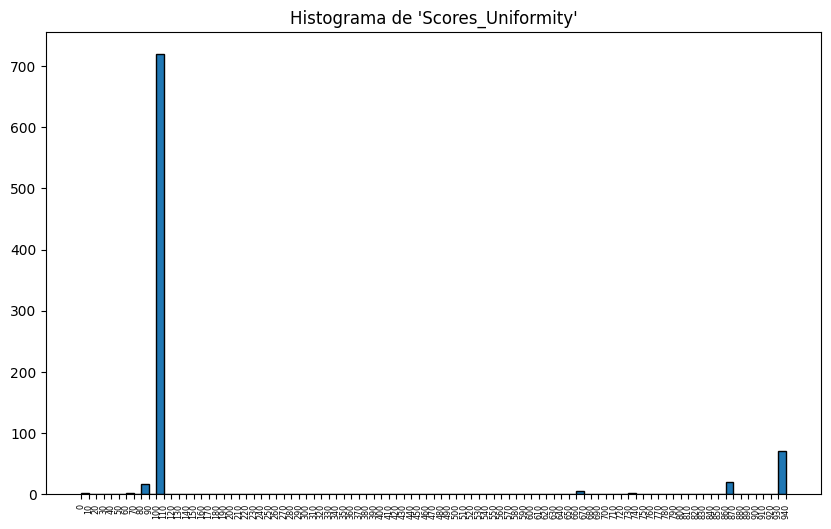

In [ ]:
plt.figure(figsize=(10, 6))
bins = np.append(np.arange(0, 930, 10), [930, 940])
plt.hist(CoffeeDS['Scores_Uniformity'], bins = bins, edgecolor='black')
plt.xticks(range(0, 950, 10), rotation=90, fontsize='xx-small')
plt.title("Histograma de 'Scores_Uniformity'")
plt.show()

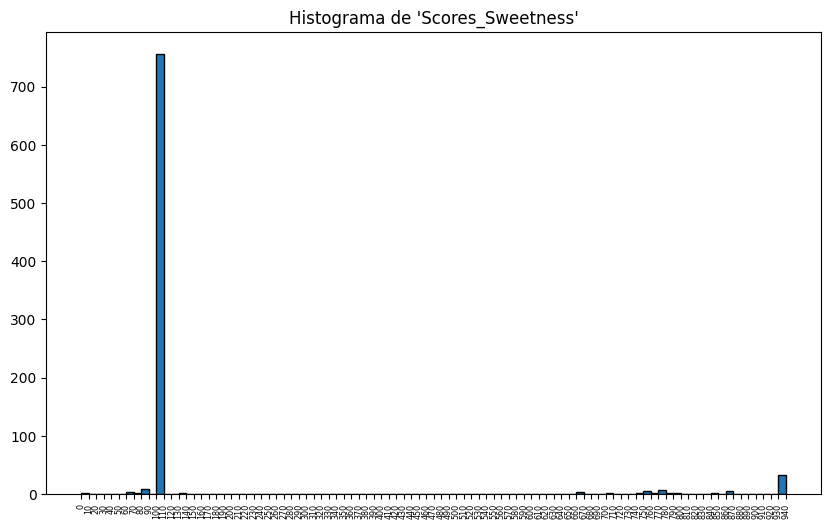

In [ ]:
plt.figure(figsize=(10, 6))
bins = np.append(np.arange(0, 930, 10), [930, 940])
plt.hist(CoffeeDS['Scores_Sweetness'], bins = bins, edgecolor='black')
plt.xticks(range(0, 950, 10), rotation=90, fontsize='xx-small')
plt.title("Histograma de 'Scores_Sweetness'")
plt.show()

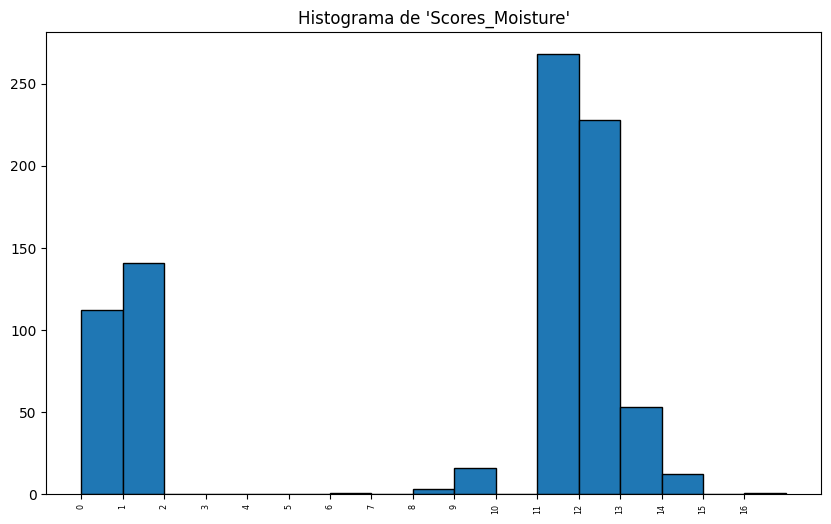

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(CoffeeDS['Scores_Moisture'], bins = 17, edgecolor='black')
plt.xticks(range(0, 17, 1), rotation=90, fontsize='xx-small')
plt.title("Histograma de 'Scores_Moisture'")
plt.show()

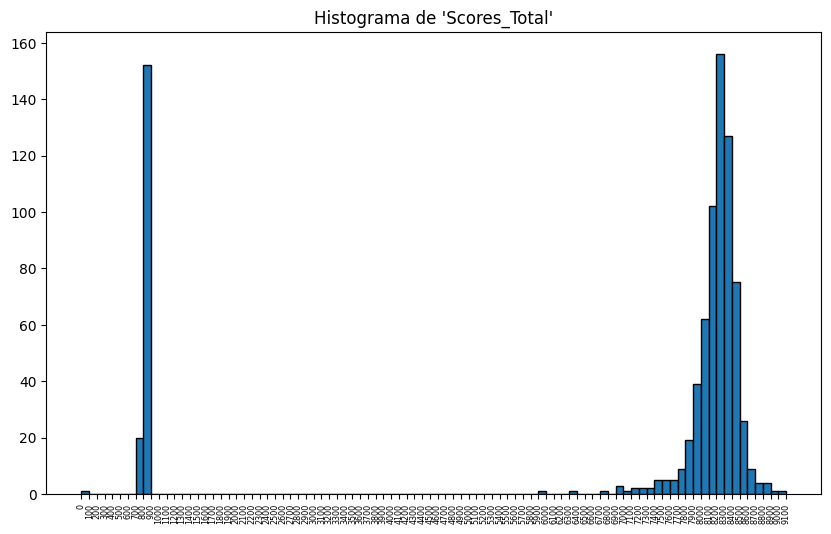

In [ ]:
plt.figure(figsize=(10, 6))
bins = np.append(np.arange(0, 9000, 100), [9000, 9100])
plt.hist(CoffeeDS['Scores_Total'], bins = bins, edgecolor='black')
plt.xticks(range(0, 9200, 100), rotation=90, fontsize='xx-small')
plt.title("Histograma de 'Scores_Total'")
plt.show()

* Se puede ver que varias caracteristicas comparten distribuciones bastante similares.

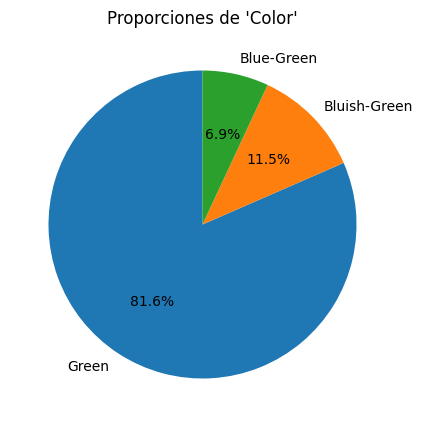

In [ ]:
color_proporciones = round(((CoffeeDS['Color'].value_counts()*100)/CoffeeDS['Color'].value_counts().sum()), 2)
color_etiquetas = color_proporciones.index
color_porciones = color_proporciones.to_list()

plt.figure(figsize=(5, 5))
plt.pie(color_porciones, labels=color_etiquetas, autopct='%1.1f%%', startangle=90)
plt.title("Proporciones de 'Color'")
plt.show()

### Outliers:

#### Boxplot de cada una de las caracteristicas (sin agrupar por color):

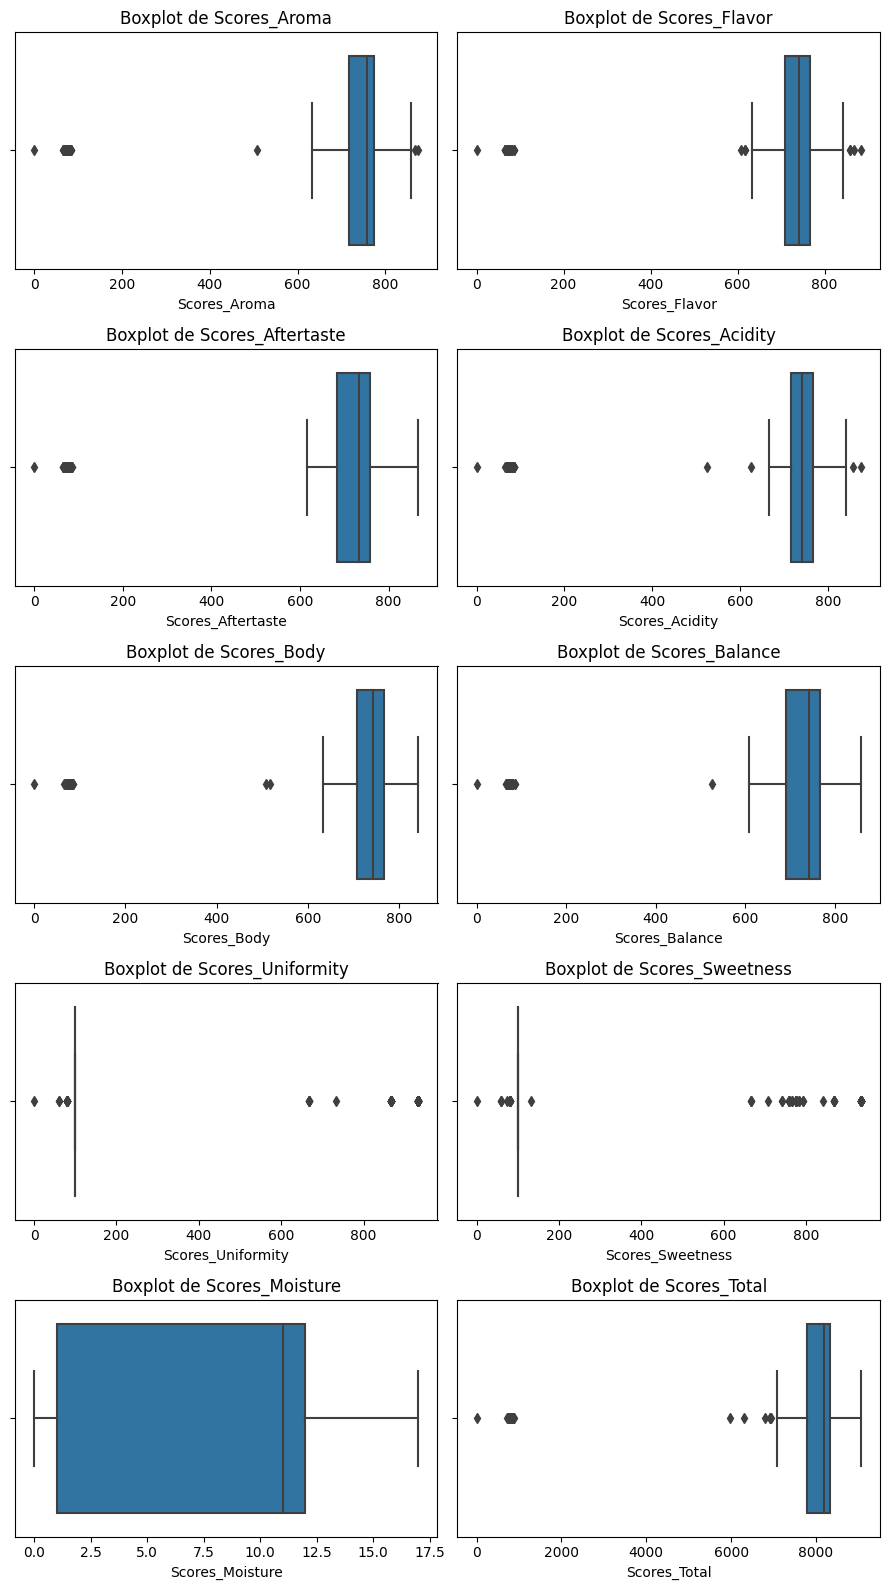

In [ ]:
fig, axes = plt.subplots(5, 2, figsize=(9, 16))

variables = CoffeeDS.drop(['Color'], axis=1).columns

for i, columna in enumerate(variables):
    row, col = divmod(i, 2)
    sns.boxplot(x=CoffeeDS[columna], ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot de {columna}')

plt.tight_layout()

plt.show()

* A simple vista la mayoria de los boxplot presentan valores atipicos.

* Solo en el boxplot de 'Scores_Moisture' no se ven outliers.

#### Boxplot de cada una de las caracteristicas (agrupados por color):

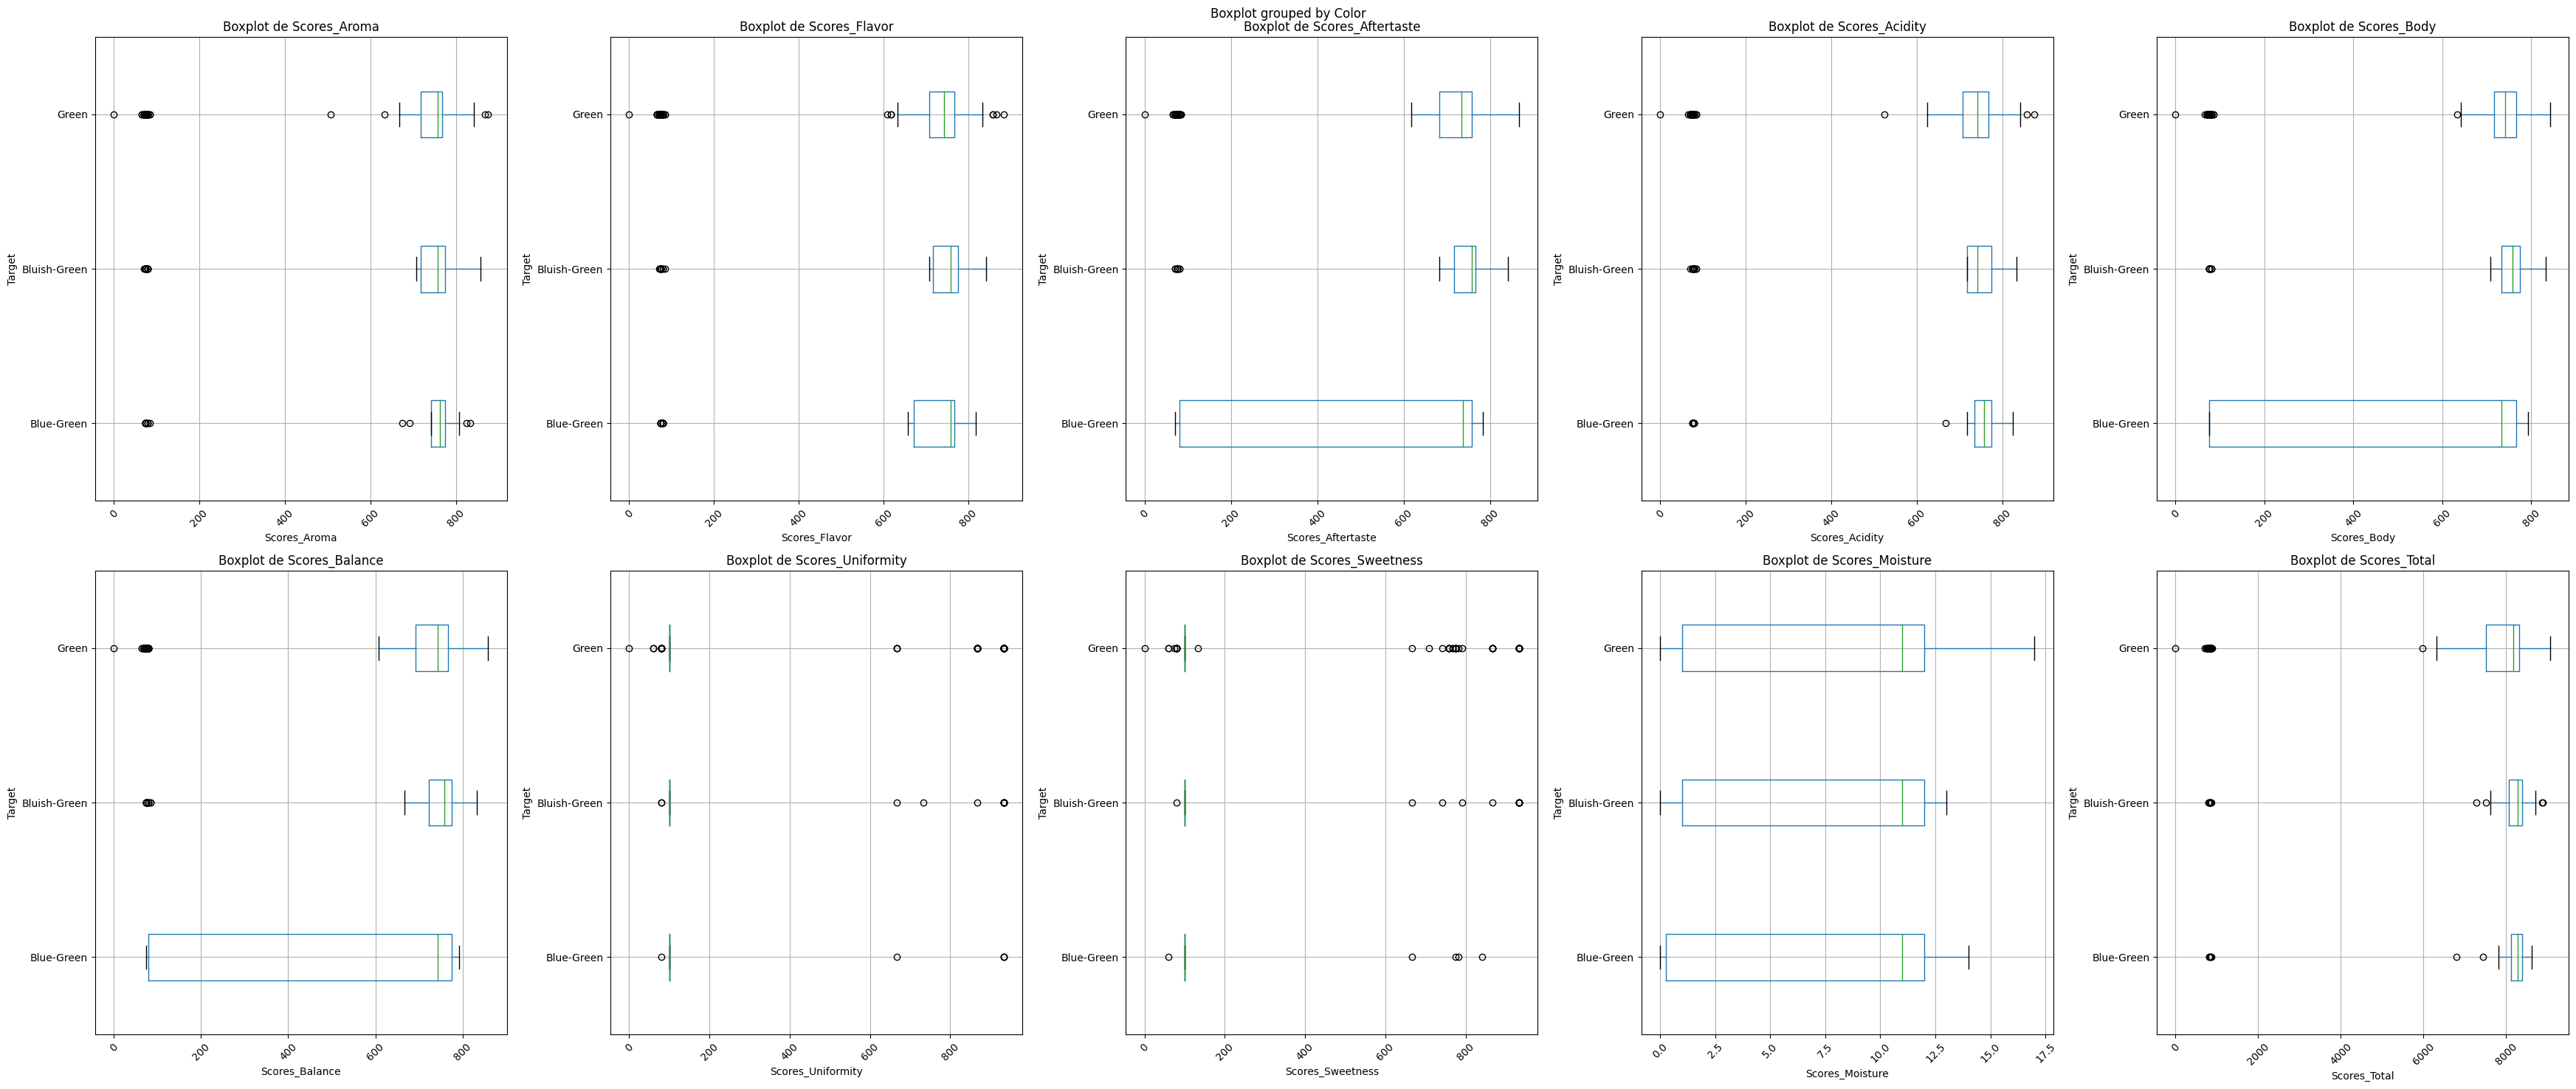

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(35, 15))

columnas = CoffeeDS.columns

# Recorre las subgráficos y crea los boxplots
for i, columna in enumerate(columnas):
    try:
        row = i // 5  # 2 filas
        col = i % 5   # 5 columnas

        ax = axes[row, col]

        CoffeeDS.boxplot(column=columna, by='Color', vert=False, ax=ax)
        ax.set_xlabel(columna)
        ax.set_ylabel('Target')
        ax.set_title(f'Boxplot de {columna}')
        ax.tick_params(axis='x', rotation=45)

    except IndexError:
        pass  # Captura el IndexError y no hace nada

# Ajusta el espaciado entre las subgráficos
plt.tight_layout()

# Muestra el gráfico
plt.show()

* Teniendo en cuenta los boxplots agrupados por estado se puede ver que efectivamente hay valores atipicos.

* Pareciera que los scores por lo general toman valores extremos para las 3 clases de la variable target.

### Matriz de correlacion:

<ipython-input-27-a1c28b82e2b2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = CoffeeDS.corr()


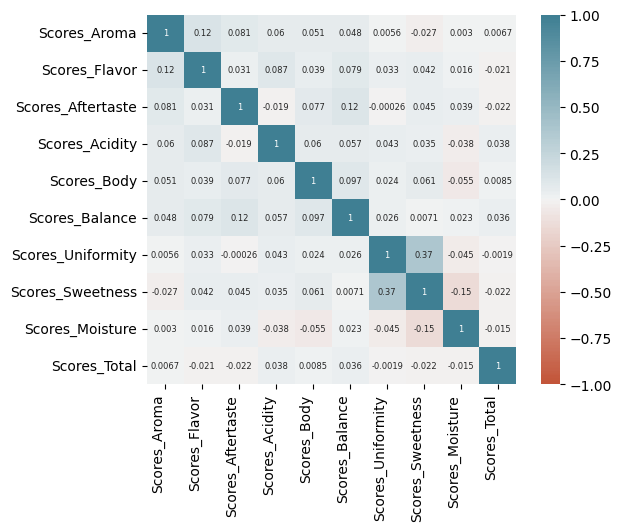

In [ ]:
corr = CoffeeDS.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
)
plt.show()

* En general se observan correlaciones bastante bajas.

* A excepcion de 'Scores_Sweetness' con 'Scores_Uniformity' con 0.37.

#### Grafico de puntos todos contra todos:

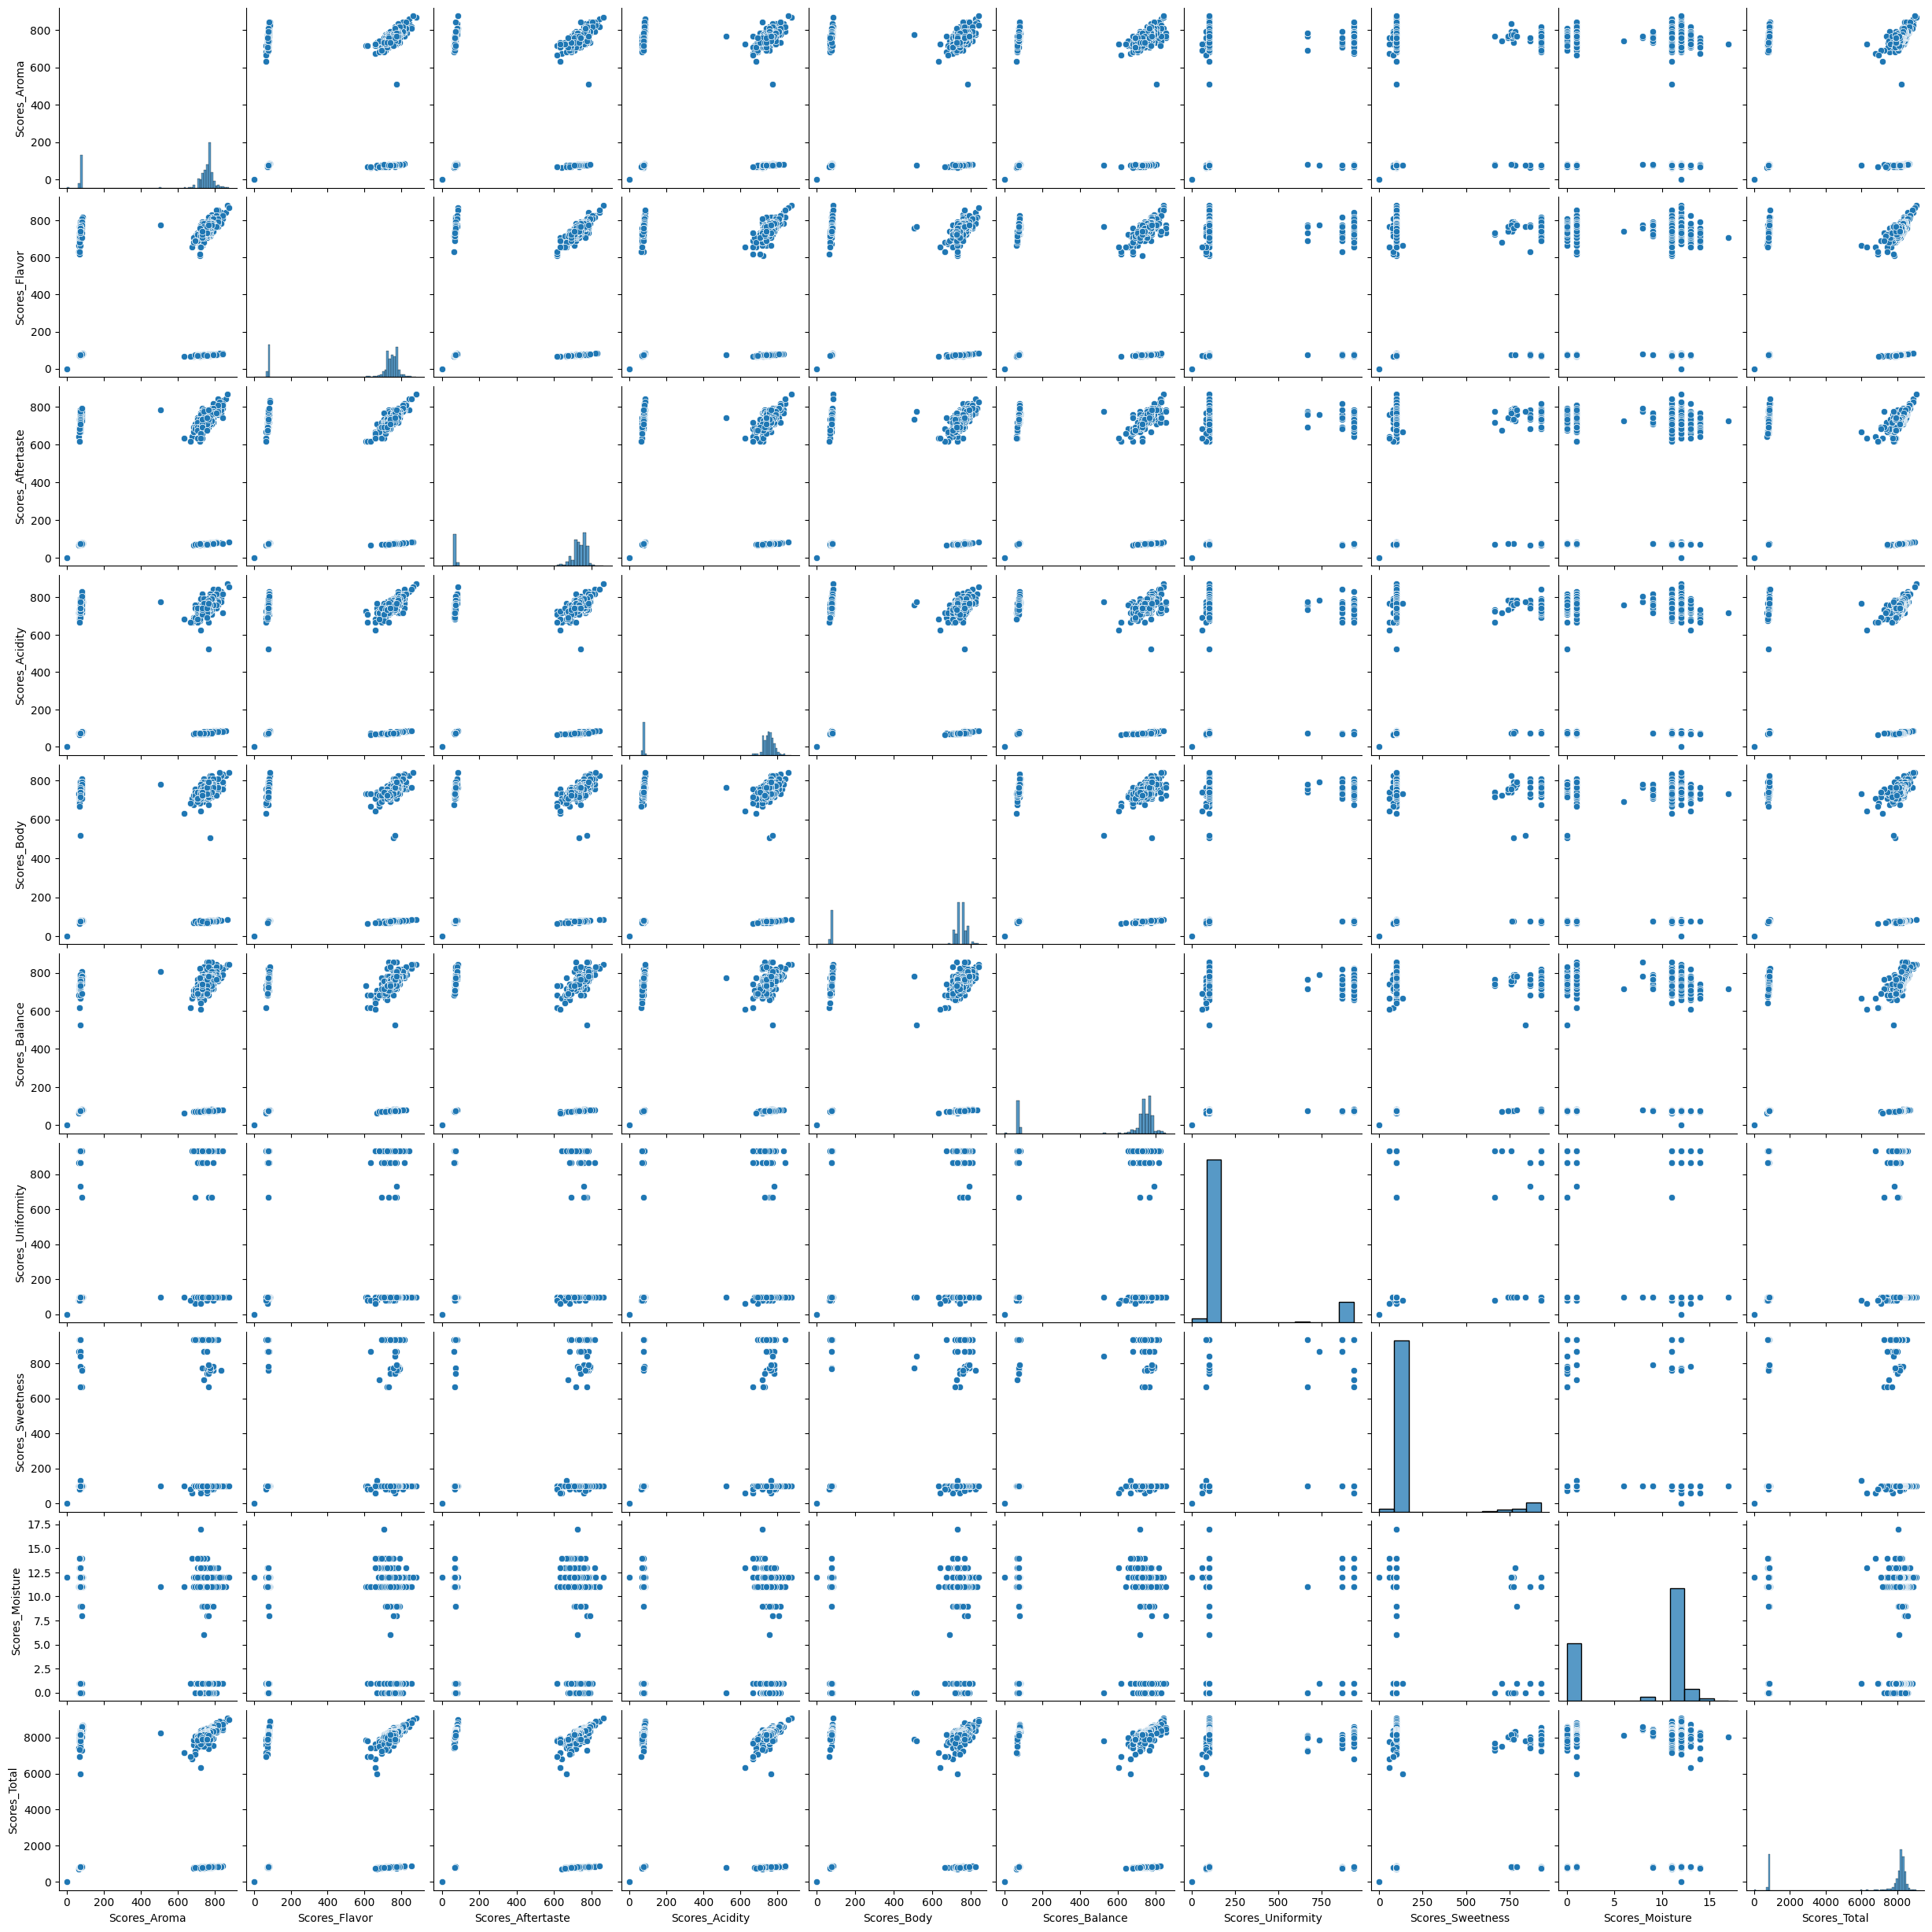

In [ ]:
sns.pairplot(CoffeeDS)

#### Quizá podamos ver mejor que sucede entre las variables si codificamos de manera binaria la variable "Color".

In [ ]:
# Crear una nueva columna "Green" en el DataFrame original
CoffeeDS['Green'] = (CoffeeDS['Color'] == 'Green').astype(int)

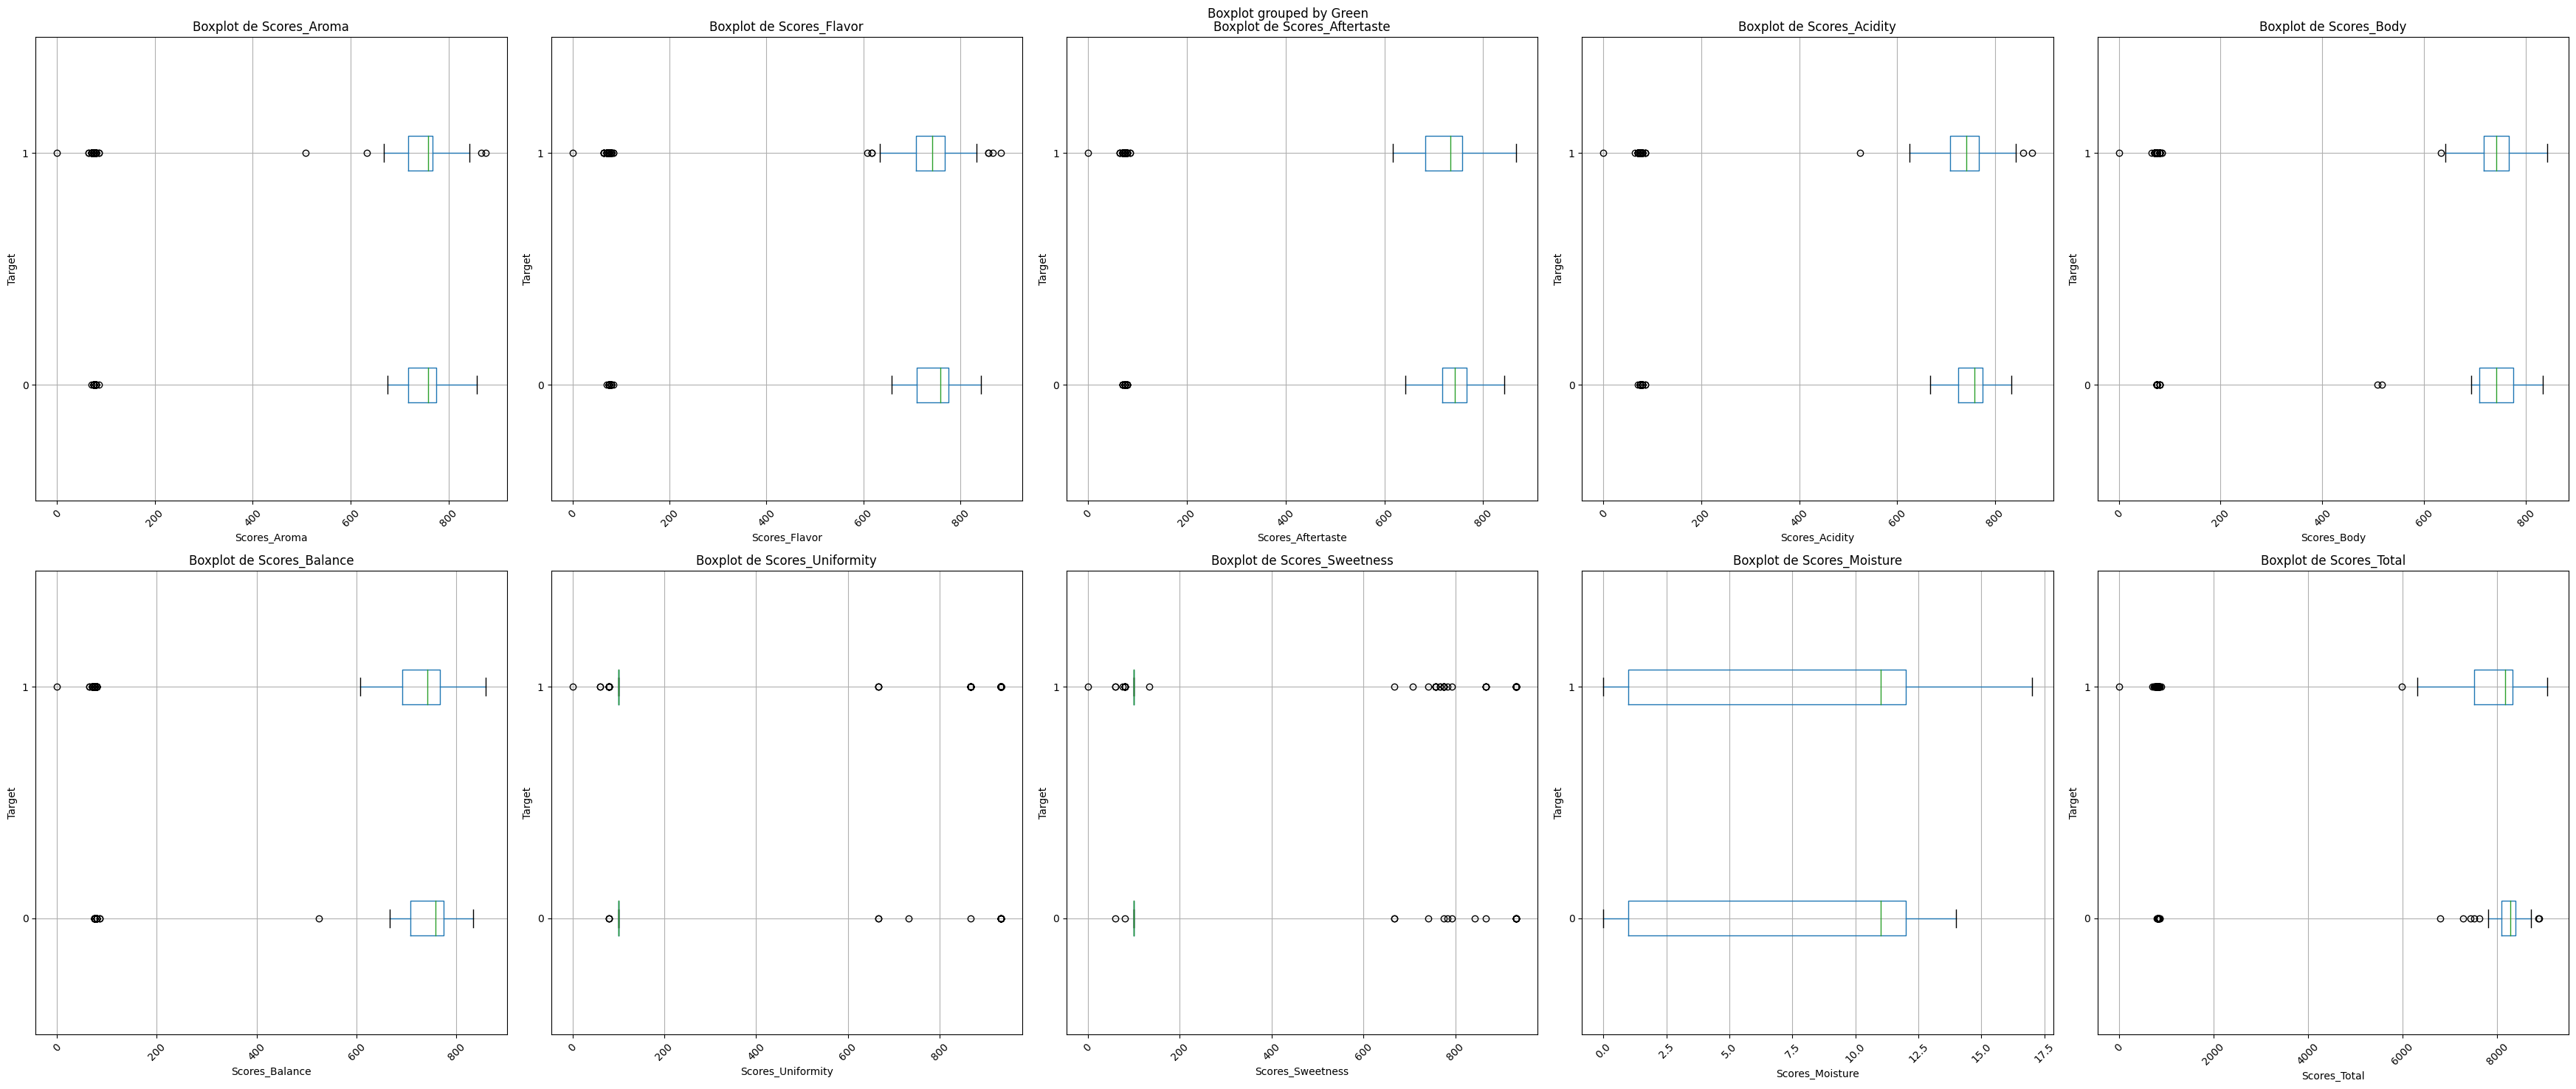

In [ ]:
# Crear una figura con subgráficos de 2x5 (2 filas, 5 columnas)
fig, axes = plt.subplots(2, 5, figsize=(35, 15))

# Lista de columnas
columnas = CoffeeDS.columns

# Recorre las subgráficos y crea los boxplots
for i, columna in enumerate(columnas):
    try:
        row = i // 5  # 2 filas
        col = i % 5   # 5 columnas

        ax = axes[row, col]

        CoffeeDS.boxplot(column=columna, by='Green', vert=False, ax=ax)
        ax.set_xlabel(columna)
        ax.set_ylabel('Target')
        ax.set_title(f'Boxplot de {columna}')
        ax.tick_params(axis='x', rotation=45)

    except IndexError:
        pass  # Captura el IndexError y no hace nada

# Ajusta el espaciado entre las subgráficos
plt.tight_layout()

# Muestra el gráfico
plt.show()

<ipython-input-31-fdfc6f88b141>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = CoffeeDS.corr()


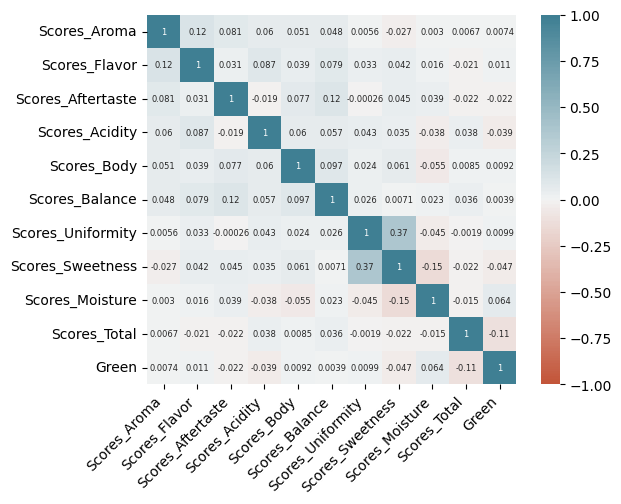

In [ ]:
# Matriz de correlacion:
corr = CoffeeDS.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

* Parece que hay muy poca correlación para determinar la clase de manera binaria. El Score_Total parece ser el que mayor correlación tiene, aunque sea negativa.

### Codificacion de variable objetivo:

In [ ]:
label_encoder = LabelEncoder()
label_encoder.fit(CoffeeDS['Color'])
CoffeeDS['Color_Codificada'] = label_encoder.transform(CoffeeDS['Color'])

In [ ]:
CoffeeDS[['Color', 'Color_Codificada']]

,Color,Color_Codificada
0,Green,2
1,Green,2
2,Blue-Green,0
3,Blue-Green,0
4,Green,2
...,...,...
830,Green,2
831,Green,2
832,Green,2
833,Bluish-Green,1


La codificacion quedo:

* Blue-Green: 0

* Bluish-Green: 1

* Green: 2

### Dividimos en variables independientes y dependientes. Como vamos a hacer validacion cruzada no dividimos en train y test.

In [ ]:
# Predictoras
X = CoffeeDS.drop(['Green', 'Color', 'Color_Codificada'], axis=1)
# Objetivo
y = CoffeeDS['Color_Codificada']

## Support Vector Machine (SVM):

### Kernel Lineal

#### Con Validacion Cruzada / Sin balanceo de clases:

Optimizacion de hiperparametro:

La idea es primero buscar el mejor hiperparametro C para el kernel lineal. Vamos a utilizar un optimizador por grilla con CV.

Los pasos son:

1. Crear un modelo SVC con kernel lineal.
2. Crear un escalador z-score
3. Hacer una tuberia.
4. Definimos la grilla de valores posibles para la optimizacion del hiperparametro C aclarando que el hiperparametro corresponde .
5. Ahora creamos el objeto que optimizara los hiperparametros pero le pasamos la tuberia aclarando que el hiperparametro C corresponde al objeto svc dentro de la tuberia.
6. Entrenamos el optimizador que en cada fold pasa los datos de entrenamiento y test por el escalador y luego los metera escalados al SVC. Esto lo hacemos asi para ya que al no tener una division de train-test general si escalamos usando la media y sd de todos los datos en los entrenamientos tanto para el optimizador como para el modelo SVC con validacion cruzada tendriamos fuga de datos.

In [ ]:
# Modelo SVM con kernel lineal
svm_lineal_1 = SVC(kernel='linear')

# Escalador z-score
escalador = StandardScaler()

# Pipeline con el escalado y el clasificador
pipeline_1 = make_pipeline(escalador, svm_lineal_1)

In [ ]:
grilla_optimizacion_1 = {'svc__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Aplicar GS para elegir el mejor C
optimizador_grilla_svc_1 = GridSearchCV(pipeline_1, grilla_optimizacion_1, cv=5)
optimizador_grilla_svc_1 = optimizador_grilla_svc_1.fit(X, y)

In [ ]:
# Mejor valor del parametro C
optimizador_grilla_svc_1.best_params_

{'svc__C': 0.0001}

Entrenamiento del modelo con el mejor parametro con validacion cruzada:

In [ ]:
# Nos quedamos con el mejor modelo (pipeline)
svm_lineal_1 = optimizador_grilla_svc_1.best_estimator_

Obtener con validacion cruzada las metricas para cada una de las iteraciones:

In [ ]:
# Generamos los folds para entrenar y testear:
k_5 = KFold(n_splits=5, shuffle=True, random_state=42)

metricas_svm_lineal_1 = cross_validate(estimator=svm_lineal_1, X=X, y=y, cv=k_5.split(X,y), return_train_score=True, scoring={'accuracy': 'accuracy', 'precision_macro': 'precision_macro', 'recall_macro': 'recall_macro'})

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

Tablas con las metricas de cada iteracion:

In [ ]:
indices = [1, 2, 3, 4, 5]
metricas_svm_lineal_df_1 = pd.DataFrame(metricas_svm_lineal_1, index=indices)
metricas_svm_lineal_df_1

,fit_time,score_time,test_accuracy,train_accuracy,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro
1,0.011316,0.007913,0.808383,0.817365,0.269461,0.272455,0.333333,0.333333
2,0.009864,0.006718,0.784431,0.823353,0.261477,0.274451,0.333333,0.333333
3,0.010488,0.006740,0.850299,0.806886,0.283433,0.268962,0.333333,0.333333
4,0.009836,0.007944,0.808383,0.817365,0.269461,0.272455,0.333333,0.333333
5,0.010214,0.007637,0.826347,0.812874,0.275449,0.270958,0.333333,0.333333


* Metricas de train y test similares no parece haber mucho overfitting en cada iteracion.

Obtenemos las predicciones de cada iteracion para construir la matriz de confusion. Al final obtendremos predicciones para cada uno de los datos del conjunto ya que en definitiva luego de testear el modelo con cada uno de los folds estariamos testeando con todos.

In [ ]:
y_pred_lineal_1 = cross_val_predict(estimator=svm_lineal_1, X=X, y=y, cv=k_5.split(X,y))

In [ ]:
matriz_confusion_lineal_1 = confusion_matrix(y, y_pred_lineal_1)
reporte_clasificacion_lineal_1 = classification_report(y, y_pred_lineal_1)
print(reporte_clasificacion_lineal_1)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.00      0.00      0.00        96
           2       0.82      1.00      0.90       681

    accuracy                           0.82       835
   macro avg       0.27      0.33      0.30       835
weighted avg       0.67      0.82      0.73       835



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


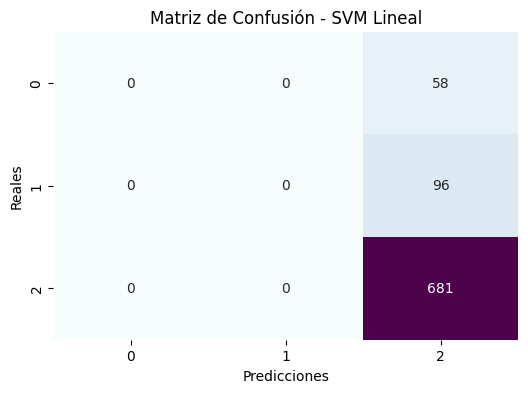

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(matriz_confusion_lineal_1, annot=True, cmap='BuPu', fmt='d', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Reales')
plt.title('Matriz de Confusión - SVM Lineal')
plt.show()

* Con un kernel lineal y el mejor hiperparametro c tenemos un modelo que solo clasifica la clase predominante que es: 2-Green .

* El motivo puede ser que estamos buscando el valor del hiperparametro 'C' que maximice la metrica 'accuracy'. Al tratarse de un dataset desbalanceado con casi el 82% de filas de clase 'Green' puede darse la situacion donde clasificar todo como esa clase nos este dando el mejor accuracy posible y puede que esto este sucediendo cuando C=0.0001 .

* Podriamos cambiar la metrica en la que queremos basar la optimizacion (dependiendo si nos interesan mas los FP o los FN) o podemos balancear el dataset y ver que pasa con esta metrica. Proponemos la segunda.

#### Con Validacion Cruzada / Con balanceo de clases:

Resampleo sintetico de clases minoritarias hasta obtener la misma cantidad que la clase mayoritaria por clase:

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_balanceada, y_balanceada = smote.fit_resample(X, y)

Resultados

In [ ]:
y_balanceada.value_counts()

2    681
0    681
1    681
Name: Color_Codificada, dtype: int64

Optimizacion de hiperparametro. Misma forma de operar que anteriormente:

In [ ]:
# Modelo SVM con kernel lineal
svm_lineal_2 = SVC(kernel='linear')

# Escalador z-score
escalador_2 = StandardScaler()

# Pipeline con el escalado y el clasificador
pipeline_2 = make_pipeline(escalador_2, svm_lineal_2)

In [ ]:
grilla_optimizacion_2 = {'svc__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Aplicar GS para elegir el mejor C
optimizador_grilla_svc_2 = GridSearchCV(pipeline_2, grilla_optimizacion_2, cv=5)
optimizador_grilla_svc_2 = optimizador_grilla_svc_2.fit(X_balanceada, y_balanceada)

In [ ]:
# Mejor valor del parametro C
optimizador_grilla_svc_2.best_params_

{'svc__C': 1}

In [ ]:
optimizador_grilla_svc_2.best_score_

0.48752337120667333

Al parecer con los hiperaparametros probados ahora el mejor accuracy ya no esta cuando se predice todo como 'Green'.

Entrenamiento del modelo con el mejor parametro con validacion cruzada:

In [ ]:
# Nos quedamos con el mejor modelo (pipeline)
svm_lineal_2 = optimizador_grilla_svc_2.best_estimator_

Obtener con validacion cruzada las metricas para cada una de las iteraciones:

In [ ]:
# Generamos los folds para entrenar y testear:
k_5 = KFold(n_splits=5, shuffle=True, random_state=42)

metricas_svm_lineal_2 = cross_validate(estimator=svm_lineal_2, X=X_balanceada, y=y_balanceada, cv=k_5.split(X_balanceada,y_balanceada), return_train_score=True, scoring={'accuracy': 'accuracy', 'precision_macro': 'precision_macro', 'recall_macro': 'recall_macro'})

Tablas con las metricas de cada iteracion:

In [ ]:
indices = [1, 2, 3, 4, 5]
metricas_svm_lineal_df_2 = pd.DataFrame(metricas_svm_lineal_2, index=indices)

metricas_svm_lineal_df_2

,fit_time,score_time,test_accuracy,train_accuracy,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro
1,0.193856,0.023943,0.481663,0.460220,0.509023,0.471642,0.480276,0.460411
2,0.165795,0.023202,0.491443,0.503672,0.502509,0.513800,0.493600,0.502936
3,0.170332,0.022467,0.481663,0.498164,0.499128,0.506173,0.488464,0.496895
4,0.176435,0.024267,0.475490,0.491743,0.476393,0.502205,0.475172,0.491833
5,0.178541,0.023245,0.453431,0.496024,0.444463,0.508119,0.445528,0.498011


* En general en cada iteracion no ve me mucho overfitting observando que las metricas de train y test son similares

Obtenemos las predicciones de cada iteracion para construir la matriz de confusion. Al final obtendremos predicciones para cada uno de los datos del conjunto ya que en definitiva luego de testear el modelo con cada uno de los folds estariamos testeando con todos.

In [ ]:
y_pred_lineal_2 = cross_val_predict(estimator=svm_lineal_2, X=X_balanceada, y=y_balanceada, cv=k_5.split(X_balanceada,y_balanceada))

In [ ]:
matriz_confusion_lineal_2 = confusion_matrix(y_balanceada, y_pred_lineal_2)
reporte_clasificacion_lineal_2 = classification_report(y_balanceada, y_pred_lineal_2)
print(reporte_clasificacion_lineal_2)

              precision    recall  f1-score   support

           0       0.52      0.52      0.52       681
           1       0.44      0.63      0.52       681
           2       0.49      0.28      0.36       681

    accuracy                           0.48      2043
   macro avg       0.48      0.48      0.47      2043
weighted avg       0.48      0.48      0.47      2043



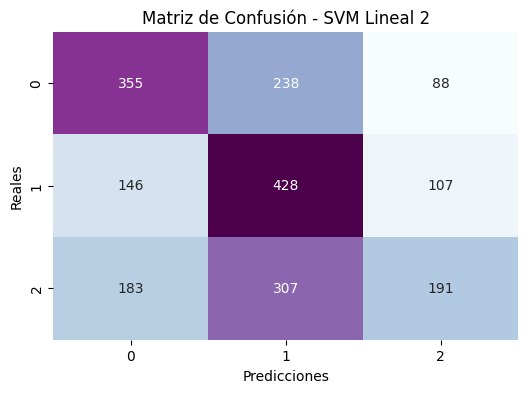

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(matriz_confusion_lineal_2, annot=True, cmap='BuPu', fmt='d', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Reales')
plt.title('Matriz de Confusión - SVM Lineal 2')
plt.show()

* Ahora ya tenemos un modelo que predice todas las clases y es el que mejor accuracy da.

* Esto es a costa de no ser muy preciso prediciendo ninguna clase, todas rondan alrededor del 50% y a costa de tener un recall cercano al 50% en todas excepto por la clase 2 que da 28%.

* En definitiva para estos datos quizas el kernel utilizado no sea la mejor opcion.

### Kernel Gaussiano

Antes de hacer el modelo con balanceo de clases se intento optimizar los hiperparametros y hacer un modelo sin balanceo de clases pero se obtuvo nuevamente en la misma situacion. Se optimizo el hp 'gamma' con el valor que maximizaba el accuracy lo cual era la situacion donde se predecia todo verdes y daba un accuracy de 82% (porcentaje de 'Green' del dataset). Por lo cual se procedio directamente a hacer con balanceo.

#### Con Validacion Cruzada / Con balanceo de clases:

Optimizacion de hiperparametro:

In [ ]:
# Modelo SVM con kernel lineal
svm_gaussiano_1 = SVC(kernel='rbf')

# Escalador z-score
escalador = StandardScaler()

# Pipeline con el escalado y el clasificador
pipeline_3 = make_pipeline(escalador, svm_gaussiano_1)

In [ ]:
grilla_optimizacion_3 = {'svc__gamma': [1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1, 10, 100]}

# Aplicar GS para elegir el mejor C
optimizador_grilla_svc_3 = GridSearchCV(pipeline_3, grilla_optimizacion_3, cv=5, scoring='accuracy')
optimizador_grilla_svc_3 = optimizador_grilla_svc_3.fit(X_balanceada, y_balanceada)

In [ ]:
# Mejor valor del parametro C
optimizador_grilla_svc_3.best_params_

{'svc__gamma': 1}

Entrenamiento del modelo con el mejor parametro con validacion cruzada:

In [ ]:
# Nos quedamos con el mejor modelo (pipeline)
svm_gaussiano_1 = optimizador_grilla_svc_3.best_estimator_

Obtener con validacion cruzada las metricas para cada una de las iteraciones:

In [ ]:
# Generamos los folds para entrenar y testear:
k_5 = KFold(n_splits=5, shuffle=True, random_state=42)

metricas_svm_gaussiano_1 = cross_validate(estimator=svm_gaussiano_1, X=X_balanceada, y=y_balanceada, cv=k_5.split(X_balanceada,y_balanceada), return_train_score=True, scoring={'accuracy': 'accuracy', 'precision_macro': 'precision_macro', 'recall_macro': 'recall_macro'})

Tablas con las metricas de cada iteracion:

In [ ]:
indices = [1, 2, 3, 4, 5]
metricas_svm_gaussiano_1_df = pd.DataFrame(metricas_svm_gaussiano_1, index=indices)
metricas_svm_gaussiano_1_df

,fit_time,score_time,test_accuracy,train_accuracy,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro
1,0.134574,0.039946,0.731051,0.805386,0.731167,0.810271,0.733285,0.804940
2,0.243653,0.074784,0.743276,0.817013,0.743375,0.819616,0.747352,0.816392
3,0.239821,0.076482,0.682152,0.817625,0.688609,0.827779,0.685327,0.816990
4,0.256153,0.074771,0.747549,0.811621,0.744443,0.818676,0.744064,0.812150
5,0.224803,0.076510,0.708333,0.806728,0.703361,0.811829,0.707659,0.807516


* Puede que estemos ante un modelo con un poco de overfitting, si observamos dentro de cada iteracion se puede ver que las metricas de test en gral son inferiores a las de train lo que es un claro indicador de un peor desempeño ante datos no vistos en el entrenamiento.

Obtenemos las predicciones de cada iteracion para construir la matriz de confusion. Al final obtendremos predicciones para cada uno de los datos del conjunto ya que en definitiva luego de testear el modelo con cada uno de los folds estariamos testeando con todos.

In [ ]:
y_pred_gaussiano_1 = cross_val_predict(estimator=svm_gaussiano_1, X=X_balanceada, y=y_balanceada, cv=k_5.split(X_balanceada,y_balanceada))

In [ ]:
matriz_confusion_gaussiano_1 = confusion_matrix(y_balanceada, y_pred_gaussiano_1)
reporte_clasificacion_gaussiano_1 = classification_report(y_balanceada, y_pred_gaussiano_1)
print(reporte_clasificacion_gaussiano_1)

              precision    recall  f1-score   support

           0       0.75      0.85      0.80       681
           1       0.69      0.72      0.70       681
           2       0.72      0.61      0.66       681

    accuracy                           0.72      2043
   macro avg       0.72      0.72      0.72      2043
weighted avg       0.72      0.72      0.72      2043



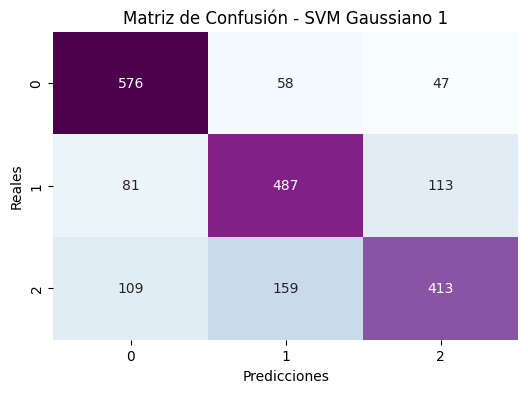

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(matriz_confusion_gaussiano_1, annot=True, cmap='BuPu', fmt='d', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Reales')
plt.title('Matriz de Confusión - SVM Gaussiano 1')
plt.show()

* Con un kernel gaussiano y el mejor hiperparametro c tenemos un modelo con mejores metricas en general que el modelo anterior.

* Todas las metricas superan el %60.

## Random Forest:

#### Con Validacion Cruzada / Sin balanceo de clases:

Optimizacion de hiperparametro:

In [ ]:
# Modelo SVM con kernel lineal
random_forest_1 = RandomForestClassifier()

# Escalador z-score
escalador = StandardScaler()

# Pipeline con el escalado y el clasificador
pipeline_4 = make_pipeline(escalador, random_forest_1)

In [ ]:
grilla_optimizacion_4 = {'randomforestclassifier__n_estimators': [50, 100, 250, 400, 500],
                         'randomforestclassifier__max_depth': [None, 5, 10, 20, 30, 50],
                         'randomforestclassifier__max_features': [5, 7, 10],
                         'randomforestclassifier__min_samples_leaf': [5, 10, 20],
                         'randomforestclassifier__min_samples_split': [5, 10, 25, 30],
                         'randomforestclassifier__random_state': [42]}

# Aplicar GS para elegir el mejor C
optimizador_grilla_random_forest_1 = GridSearchCV(pipeline_4, grilla_optimizacion_4, cv=5, scoring='accuracy')
optimizador_grilla_random_forest_1 = optimizador_grilla_random_forest_1.fit(X, y)

In [ ]:
# Mejor valor del parametro C
optimizador_grilla_random_forest_1.best_params_

{'randomforestclassifier__max_depth': None,
 'randomforestclassifier__max_features': 5,
 'randomforestclassifier__min_samples_leaf': 5,
 'randomforestclassifier__min_samples_split': 25,
 'randomforestclassifier__n_estimators': 50,
 'randomforestclassifier__random_state': 42}

Entrenamiento del modelo con el mejor parametro con validacion cruzada:

In [ ]:
# Nos quedamos con el mejor modelo (pipeline)
random_forest_1 = optimizador_grilla_random_forest_1.best_estimator_

Obtener con validacion cruzada las metricas para cada una de las iteraciones:

In [ ]:
# Generamos los folds para entrenar y testear:
k_5 = KFold(n_splits=5, shuffle=True, random_state=42)

metricas_random_forest_1 = cross_validate(estimator=random_forest_1, X=X, y=y, cv=k_5.split(X, y), return_train_score=True, scoring={'accuracy': 'accuracy', 'precision_macro': 'precision_macro', 'recall_macro': 'recall_macro'})

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

Tablas con las metricas de cada iteracion:

In [ ]:
indices = [1, 2, 3, 4, 5]
metricas_random_forest_1_df = pd.DataFrame(metricas_random_forest_1, index=indices)
metricas_random_forest_1_df

,fit_time,score_time,test_accuracy,train_accuracy,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro
1,0.484403,0.025022,0.802395,0.824850,0.269076,0.534424,0.330864,0.362814
2,0.102087,0.008947,0.784431,0.823353,0.261477,0.274451,0.333333,0.333333
3,0.108286,0.009778,0.850299,0.806886,0.283433,0.268962,0.333333,0.333333
4,0.110308,0.009413,0.808383,0.817365,0.269461,0.272455,0.333333,0.333333
5,0.115015,0.010767,0.826347,0.814371,0.275449,0.604698,0.333333,0.337662


* Se observan metricas de train/test similares con muy poco overfitting aparentemente.

In [ ]:
y_pred_random_forest_1 = cross_val_predict(estimator=random_forest_1, X=X, y=y, cv=k_5.split(X,y))

In [ ]:
matriz_confusion_random_forest_1 = confusion_matrix(y, y_pred_random_forest_1)
reporte_clasificacion_random_forest_1 = classification_report(y, y_pred_random_forest_1)
print(reporte_clasificacion_random_forest_1)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.00      0.00      0.00        96
           2       0.82      1.00      0.90       681

    accuracy                           0.81       835
   macro avg       0.27      0.33      0.30       835
weighted avg       0.66      0.81      0.73       835



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


* Con estos hiperparametros el modelo no predice algunas clases lo que termina haciendo que la precision y el recall de las clases 0 y 1 sean 0. Misma situacion que antes.

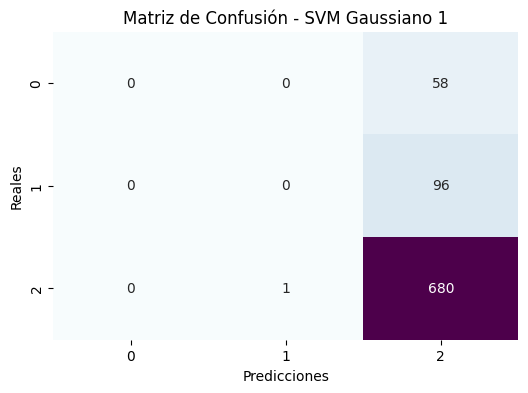

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(matriz_confusion_random_forest_1, annot=True, cmap='BuPu', fmt='d', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Reales')
plt.title('Matriz de Confusión - SVM Random Forest 1')
plt.show()

* Otra vez, si queremos optimizar el accuracy. Aparentemente sigue conviniendo buscar predecir todo como 'Green' para maximizar el accuracy con los hiperparametros devueltos por el GridCV.

#### Con Validacion Cruzada / Sin balanceo de clases:

Optimizacion de hiperparametro:

In [ ]:
# Modelo SVM con kernel lineal
random_forest_2 = RandomForestClassifier()

# Escalador z-score
escalador = StandardScaler()

# Pipeline con el escalado y el clasificador
pipeline_5 = make_pipeline(escalador, random_forest_2)

In [ ]:
grilla_optimizacion_5 = {'randomforestclassifier__n_estimators': [50, 100, 250, 400, 500],
                         'randomforestclassifier__max_depth': [None, 5, 10, 20, 30, 50],
                         'randomforestclassifier__max_features': [5, 7, 10],
                         'randomforestclassifier__min_samples_leaf': [5, 10, 20],
                         'randomforestclassifier__min_samples_split': [5, 10, 25, 30],
                         'randomforestclassifier__random_state': [42]}

# Aplicar GS para elegir el mejor C
optimizador_grilla_random_forest_2 = GridSearchCV(pipeline_5, grilla_optimizacion_5, cv=5, scoring='accuracy')
optimizador_grilla_random_forest_2 = optimizador_grilla_random_forest_2.fit(X_balanceada, y_balanceada)

In [ ]:
# Mejor valor del parametro C
optimizador_grilla_random_forest_2.best_params_

{'randomforestclassifier__max_depth': None,
 'randomforestclassifier__max_features': 5,
 'randomforestclassifier__min_samples_leaf': 5,
 'randomforestclassifier__min_samples_split': 5,
 'randomforestclassifier__n_estimators': 500,
 'randomforestclassifier__random_state': 42}

Entrenamiento del modelo con el mejor parametro con validacion cruzada:

In [ ]:
# Nos quedamos con el mejor modelo (pipeline)
random_forest_2 = optimizador_grilla_random_forest_2.best_estimator_

Obtener con validacion cruzada las metricas para cada una de las iteraciones:

In [ ]:
# Generamos los folds para entrenar y testear:
k_5 = KFold(n_splits=5, shuffle=True, random_state=42)

metricas_random_forest_2 = cross_validate(estimator=random_forest_2, X=X_balanceada, y=y_balanceada, cv=k_5.split(X_balanceada, y_balanceada), return_train_score=True, scoring={'accuracy': 'accuracy', 'precision_macro': 'precision_macro', 'recall_macro': 'recall_macro'})

Tablas con las metricas de cada iteracion:

In [ ]:
indices = [1, 2, 3, 4, 5]
metricas_random_forest_2_df = pd.DataFrame(metricas_random_forest_2, index=indices)
metricas_random_forest_2_df

,fit_time,score_time,test_accuracy,train_accuracy,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro
1,3.717260,0.063913,0.823961,0.953488,0.824799,0.953516,0.824948,0.953444
2,2.008970,0.059010,0.819071,0.958996,0.819949,0.959042,0.821207,0.958990
3,2.473852,0.076023,0.843521,0.960832,0.842692,0.960812,0.843835,0.960867
4,3.083422,0.055804,0.857843,0.957798,0.856333,0.957952,0.855906,0.957901
5,2.146756,0.054016,0.852941,0.957798,0.851667,0.958050,0.852482,0.957762


Peor rendimiento en test que en train, modelo con algo de overfitting.

In [ ]:
y_pred_random_forest_2 = cross_val_predict(estimator=random_forest_2, X=X_balanceada, y=y_balanceada, cv=k_5.split(X_balanceada,y_balanceada))

In [ ]:
matriz_confusion_random_forest_2 = confusion_matrix(y_balanceada, y_pred_random_forest_2)
reporte_clasificacion_random_forest_2 = classification_report(y_balanceada, y_pred_random_forest_2)
print(reporte_clasificacion_random_forest_2)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       681
           1       0.84      0.82      0.83       681
           2       0.82      0.80      0.81       681

    accuracy                           0.84      2043
   macro avg       0.84      0.84      0.84      2043
weighted avg       0.84      0.84      0.84      2043



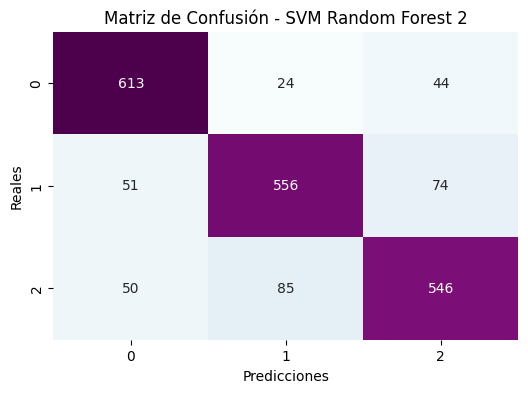

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(matriz_confusion_random_forest_2, annot=True, cmap='BuPu', fmt='d', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Reales')
plt.title('Matriz de Confusión - SVM Random Forest 2')
plt.show()

* Obtenemos las mejores metricas con este metodo para estos datos.

## Conclusiones:

* Si a los objetivos de nuestro estudio lo que mas nos interesa es obtener una taza general de aciertos de clases (accuracy) lo mas alta posible el dataset se encuentra tan desbalanceado como para que se la situacion donde con predecir unicamente la clase mayoritaria basta. Por lo que obtendriamos un modelo completamente ingenuo que solo predice una clase (no nos serviria para nada).

* Ahora si lo que queremos es un algoritmo que maximice el accuracy pero que funcione para todas las clases (para que tenga alguna utilidad mas alla de obtener una metrica alta) es necesario si o si balancear el dataset.

* En cuanto a SVM por las metricas mas altas obtenidas con el kernel gaussiano se podria llegar a pensar que el dataset esta mas cerca de ser no linealmente separable.

* Haciendo una comparacion global de los metodos del presente tp el mayor desempeño se logro con random forest por lo que seria el algoritmo elegido entre los dos si tuvieramos que quedarnos con uno guiandonos por las metricas.